# Decision Tree - Titanic
The Goal: To construct a decision tree to predict whether or not a given passenger survived. (You may want to limit the depth of the tree (max_depth option)).

In [1]:
'''Imported Packages'''
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

## Data Description

### Variable Descriptions:
* **survival:** Survival (0 = No; 1 = Yes)
* **pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **name:** Name
* **sex:** Sex
* **age:** Age
* **sibsp:** Number of Siblings/Spouses Aboard
* **parch:** Number of Parents/Children Aboard
* **ticket:** Ticket Number
* **fare:** Passenger Fare
* **cabin:** Cabin
* **embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Special Notes:
* Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
* Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5
* With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.
    * Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    * Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    * Parent:   Mother or Father of Passenger Aboard Titanic
    * Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
    * Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children traveled only with a nanny, therefore parch=0 for them.  As well, some traveled with very close friends or neighbors in a village, however, the definitions do not support such relations.


## Data Preparation 

In [2]:
'''Load the Data'''

# path to the data files
DATASET_DIR = "" # leave blank for same directory
TRAIN_FILE_NAME = "train.csv"

# load titanic dataset
titanic_train_df = pd.read_csv(DATASET_DIR + TRAIN_FILE_NAME, delimiter = ",")

# randomize the dataset
'''
If you split the data then the resulting sets won't represent the true distribution of the dataset. 
Therefore, we have to shuffle the original dataset in order to minimise variance and ensure that the model will generalize well to new, unseen data points.
This could also be done with the following code, but that would change the array structure from a dataframe to a numpy array.
np.random.seed(42)
titanic = shuffle(titanic)
'''
titanic_train_df = titanic_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first 5 rows of our data
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


### Exploratory Data Analysis (EDA)

In [3]:
# what does the structure of the data look like?
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
'''Prepare the data'''


titanic_train_df = titanic_train_df.drop("Name", axis = 1)
titanic_train_df = titanic_train_df.drop("Ticket", axis = 1)
titanic_train_df = titanic_train_df.drop("Cabin", axis = 1)

# categorical variables need to be altered to 
cat_cols = ['Sex','Embarked']
for col in cat_cols:
    titanic_train_df[col] = titanic_train_df[col].astype('category').cat.codes

continuous_cols = ['Age', 'Fare']
for col in continuous_cols:
    titanic_train_df[col] = pd.to_numeric(titanic_train_df[col], errors='coerce')

titanic_train_df = titanic_train_df.dropna()
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int8   
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Embarked     714 non-null    int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 46.0 KB


In [5]:
x = titanic_train_df.drop(['Survived'], axis=1)
y = titanic_train_df['Survived']
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x, y)

DecisionTreeClassifier(max_depth=3)

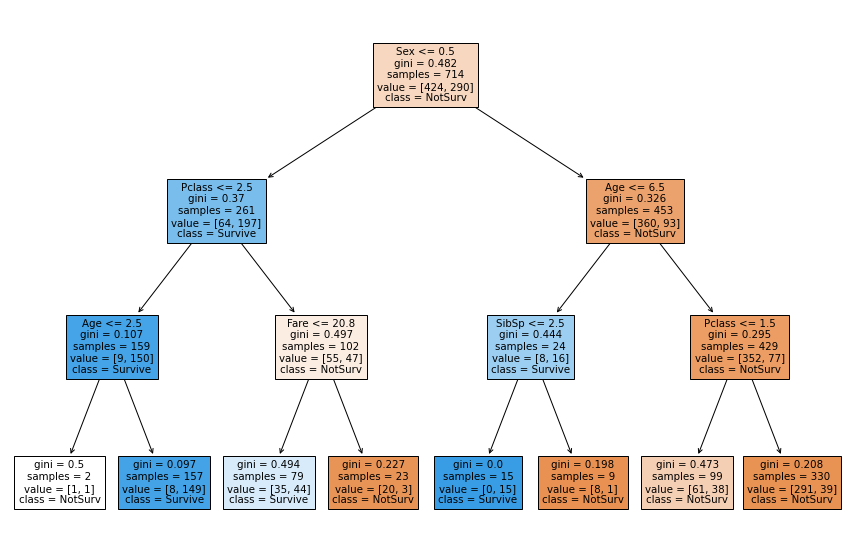

In [6]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree, feature_names = x.columns, class_names = ['NotSurv','Survive'], filled=True)
plt.show()

In [7]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

viz = dtreeviz(decision_tree,             
               x_data=x,
               y_data=y,
               target_name='class',
               feature_names=x.columns, 
               class_names=list(['NotSurv','Survive']), 
               title="Decision Tree - Titanic data set") 
viz
viz.view()

* At each node, we can see a stacked histogram of the feature that is used for splitting the observations, colored by class. This way, we can see how the classes are segregated by each split. The small triangle with the value at the x-axis is the splitting point. 
* The right branches of the tree indicate selecting the values larger or equal to the splitting value, while the left one lesser than the splitting value. The leaf nodes are represented as pie charts, which show what fraction of the observations within the leaf belongs to which class. This way, we easily see which class is the majority one, so also the model’s prediction.
* One thing we do not see at this plot is the value of the Gini coefficient at each node. In my opinion, the histogram provides more intuition about the split and the value of the coefficient might not be that relevant in case of a presentation for the stakeholders either way.